In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [149]:
os.chdir("D:\Stackerbee\AgriCrops\Cleaned Data - Copy")
# os.chdir("D:\Stackerbee\AgriCrops")
data = pd.read_csv('Green Gram Dal (Moong Dal)_cleaned_cleaned.csv')

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State Name                 1092 non-null   object 
 1   District Name              1092 non-null   object 
 2   Market Name                1092 non-null   object 
 3   Variety                    1092 non-null   object 
 4   Group                      1092 non-null   object 
 5   Arrivals (Tonnes)          1091 non-null   float64
 6   Min Price (Rs./Quintal)    1092 non-null   int64  
 7   Max Price (Rs./Quintal)    1092 non-null   int64  
 8   Modal Price (Rs./Quintal)  1092 non-null   int64  
 9   Reported Date              1092 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 85.4+ KB


In [151]:
data.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.6,5000,5050,5040,2022-12-08
1,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.4,4350,4400,4380,2022-07-22
2,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,6.5,4500,6950,4550,2019-02-06
3,Madhya Pradesh,Panna,Ajaygarh,Small (Split),Pulses,9.2,4500,4630,4600,2019-02-05
4,Madhya Pradesh,Chhindwara,Amarwda,Green Gram Dal,Pulses,150.0,3900,4100,4000,2022-09-16


In [152]:
print(data.shape)

(1092, 10)


## Data Analysis

1. Finding the missing values
2. All the numerical variables.
3. Distribution of the numerical variables.
4. Categorical variables.
5. Credibility of Categorical variables.
6. Outliers.
7. Relationship between the dependent and independent varables.¶

### Missing values

In [153]:
columns_with_missing_values = [feature for feature in data.columns if data[feature].isnull().sum() > 1] 
columns_with_missing_values

[]

### All the numerical Variables

In [154]:
columns_with_numerical_values = [feature for feature in data if data[feature].dtypes != 'O'] 
columns_with_numerical_values

['Arrivals (Tonnes)',
 'Min Price (Rs./Quintal)',
 'Max Price (Rs./Quintal)',
 'Modal Price (Rs./Quintal)']

In [155]:
data[columns_with_numerical_values].head()

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,5.6,5000,5050,5040
1,5.4,4350,4400,4380
2,6.5,4500,6950,4550
3,9.2,4500,4630,4600
4,150.0,3900,4100,4000


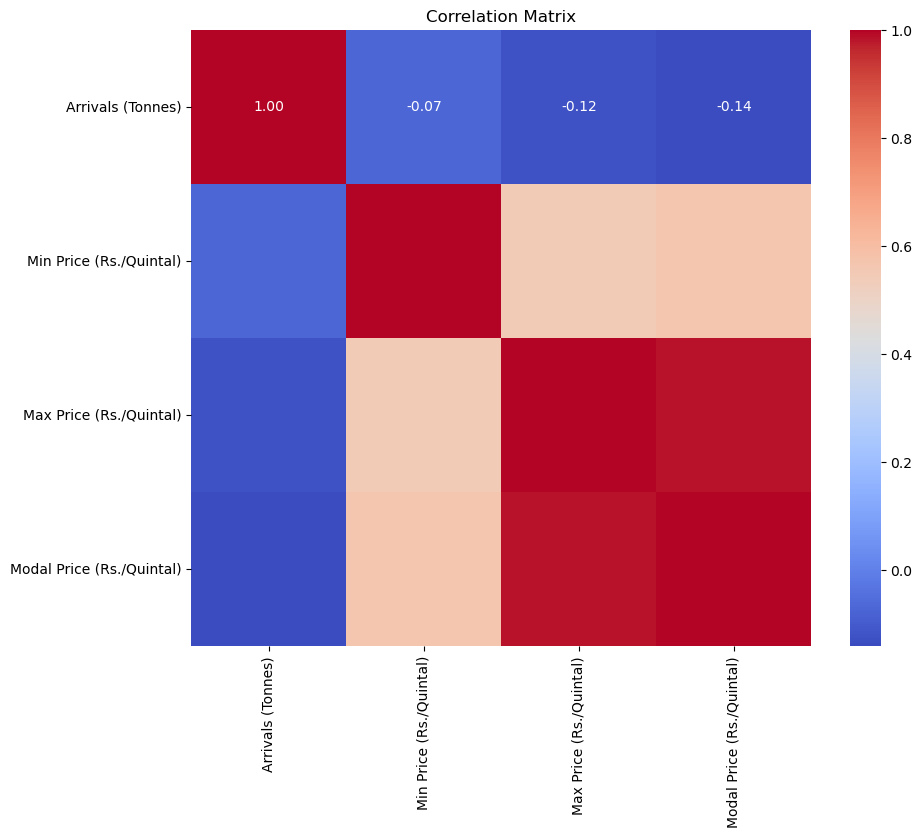

In [156]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[columns_with_numerical_values].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [157]:
data['Reported Date'] = pd.to_datetime(data['Reported Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 1092 non-null   object        
 1   District Name              1092 non-null   object        
 2   Market Name                1092 non-null   object        
 3   Variety                    1092 non-null   object        
 4   Group                      1092 non-null   object        
 5   Arrivals (Tonnes)          1091 non-null   float64       
 6   Min Price (Rs./Quintal)    1092 non-null   int64         
 7   Max Price (Rs./Quintal)    1092 non-null   int64         
 8   Modal Price (Rs./Quintal)  1092 non-null   int64         
 9   Reported Date              1092 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 85.4+ KB


In [158]:
dataframe = data.copy()
# Extracting day, month, and year
dataframe['Day'] = dataframe['Reported Date'].dt.day
dataframe['Month'] = dataframe['Reported Date'].dt.month
dataframe['Year'] = dataframe['Reported Date'].dt.year

dataframe.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Day,Month,Year
0,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.6,5000,5050,5040,2022-12-08,8,12,2022
1,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.4,4350,4400,4380,2022-07-22,22,7,2022
2,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,6.5,4500,6950,4550,2019-02-06,6,2,2019
3,Madhya Pradesh,Panna,Ajaygarh,Small (Split),Pulses,9.2,4500,4630,4600,2019-02-05,5,2,2019
4,Madhya Pradesh,Chhindwara,Amarwda,Green Gram Dal,Pulses,150.0,3900,4100,4000,2022-09-16,16,9,2022


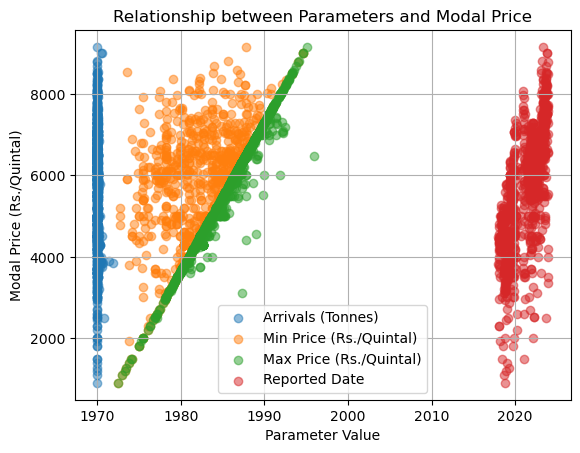

In [159]:
for column in ['Arrivals (Tonnes)', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)','Reported Date']:
    plt.scatter(dataframe[column], dataframe['Modal Price (Rs./Quintal)'],
                alpha=0.5, label=column)

plt.xlabel('Parameter Value')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Relationship between Parameters and Modal Price')
plt.legend()
plt.grid(True)
plt.show()

In [160]:
col = columns_with_numerical_values + ['Reported Date','Day','Month','Year']
monthly_mean_data = dataframe[col].groupby('Month').mean()
monthly_mean_data[columns_with_numerical_values]

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Month,,,,
1,2.034831,4885.123596,5534.280899,5458.382022
2,2.195506,4740.314607,5559.404494,5515.898876
3,44.238209,4617.686567,5140.089552,5104.552239
4,21.174394,4735.939394,5488.424242,5334.272727
5,10.249388,4694.163265,6159.530612,5982.551020
6,7.382222,4716.470000,6110.620000,6013.820000
7,7.551754,4568.245614,5941.140351,5900.350877
8,3.413208,4628.122642,5912.103774,5847.009434
9,8.695977,4265.896552,5722.505747,5647.218391


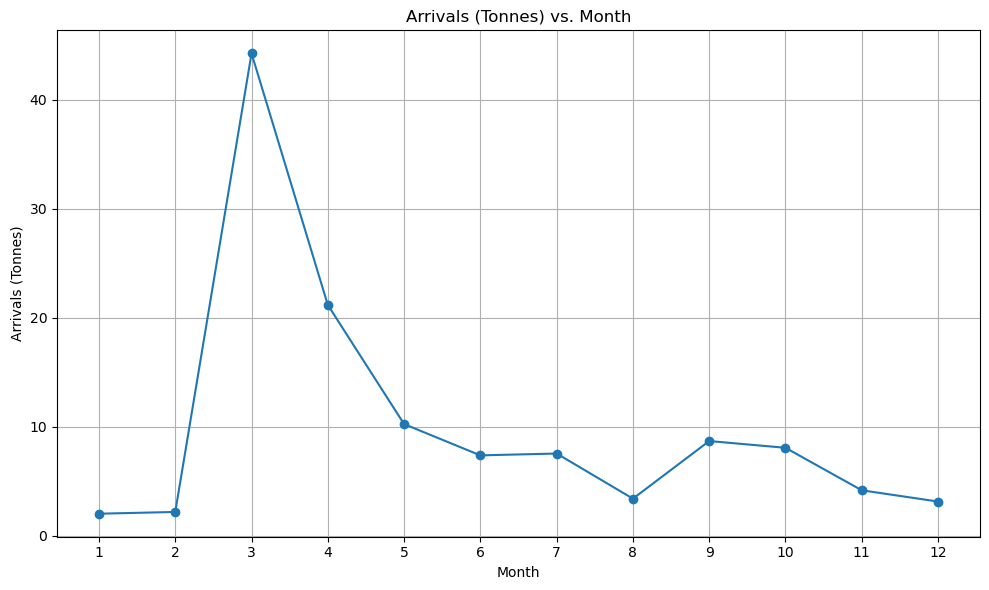

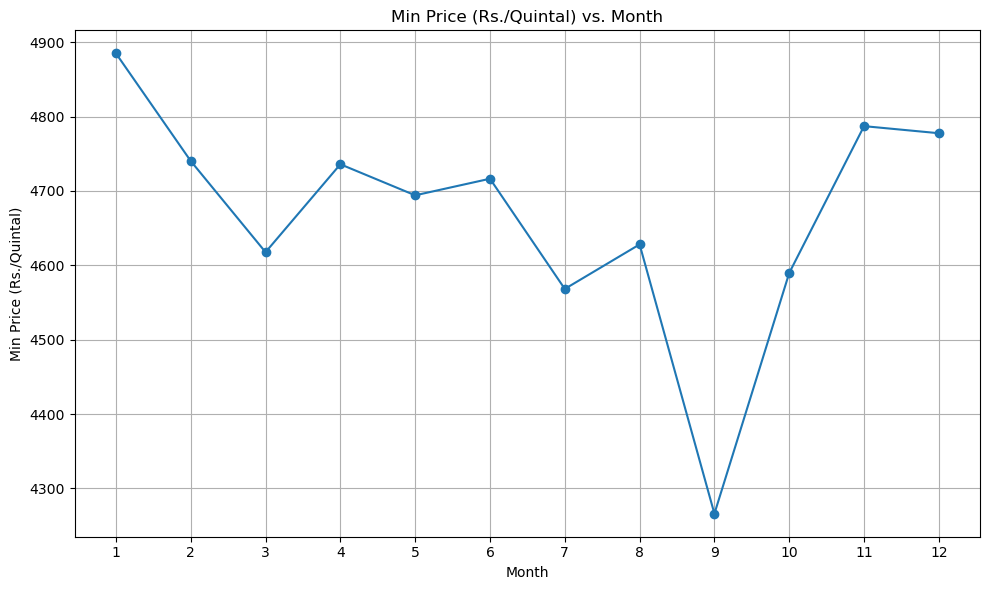

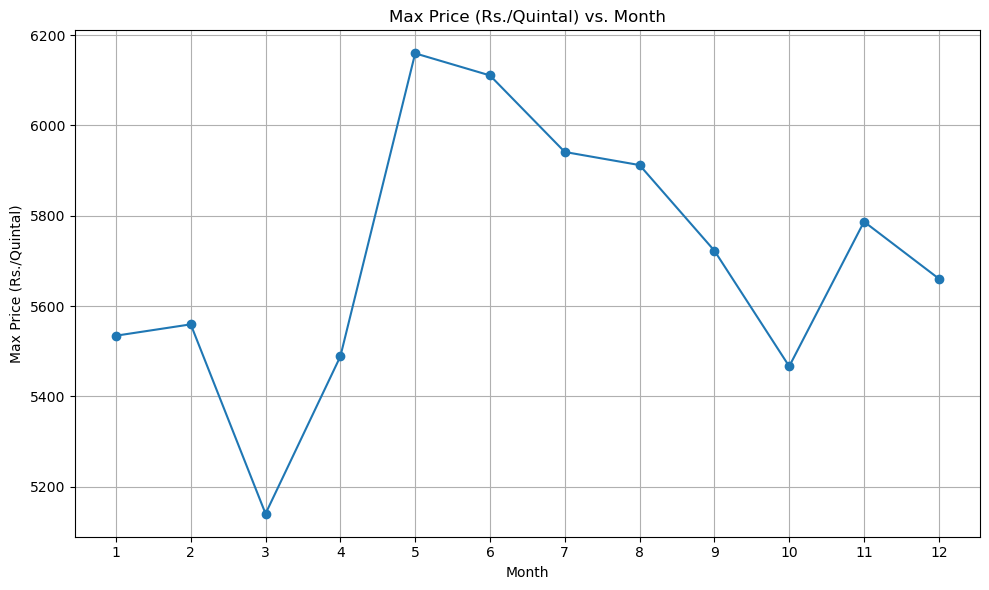

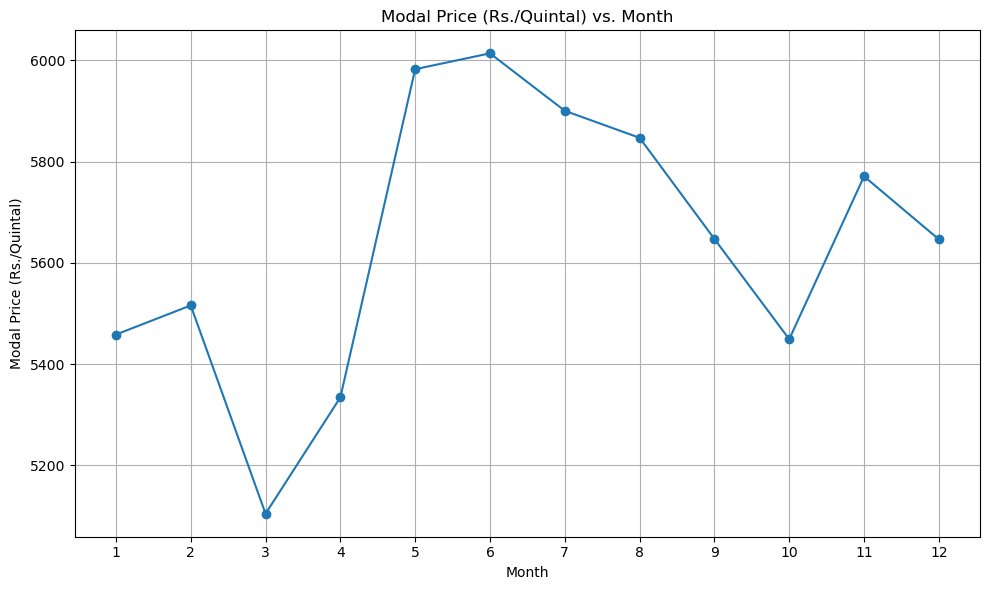

In [161]:
for column in columns_with_numerical_values:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_mean_data.index, monthly_mean_data[column], marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'{column} vs. Month')
    plt.grid(True)
    plt.xticks(monthly_mean_data.index)  # Set x ticks to match the months
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [162]:
yearly_mean_data = dataframe[col].groupby('Year').mean()
yearly_mean_data[columns_with_numerical_values]

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Year,,,,
2018,2.198571,3834.630952,4244.982143,4207.291667
2019,24.825041,4233.095041,4915.004132,4798.342975
2020,2.728205,4707.461538,5717.974359,5699.000000
2021,1.498225,4385.235294,5871.000000,5851.294118
2022,5.786345,4844.735294,6135.710084,6082.621849
2023,7.475319,5718.289362,7153.485106,7062.638298


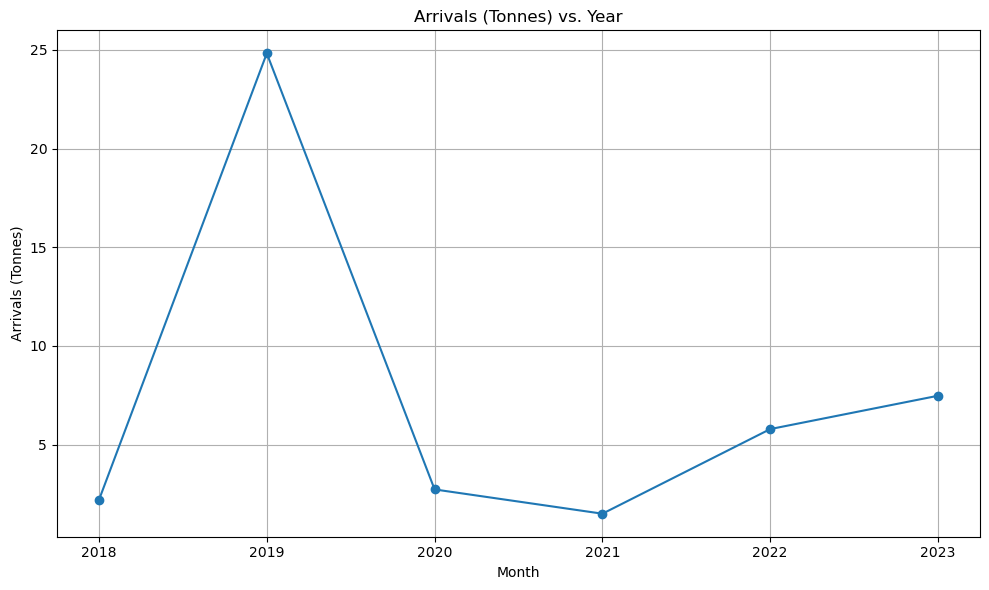

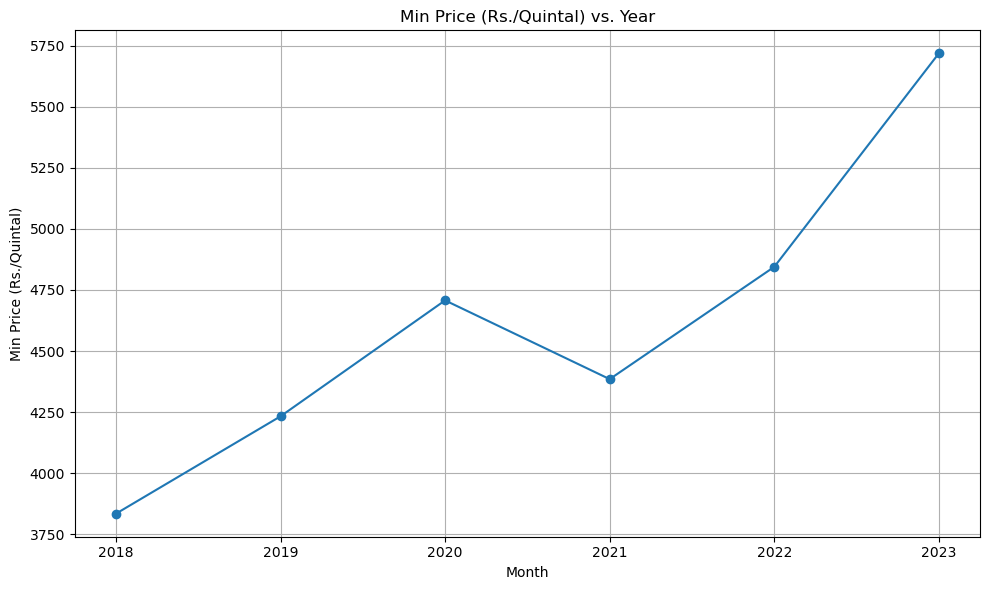

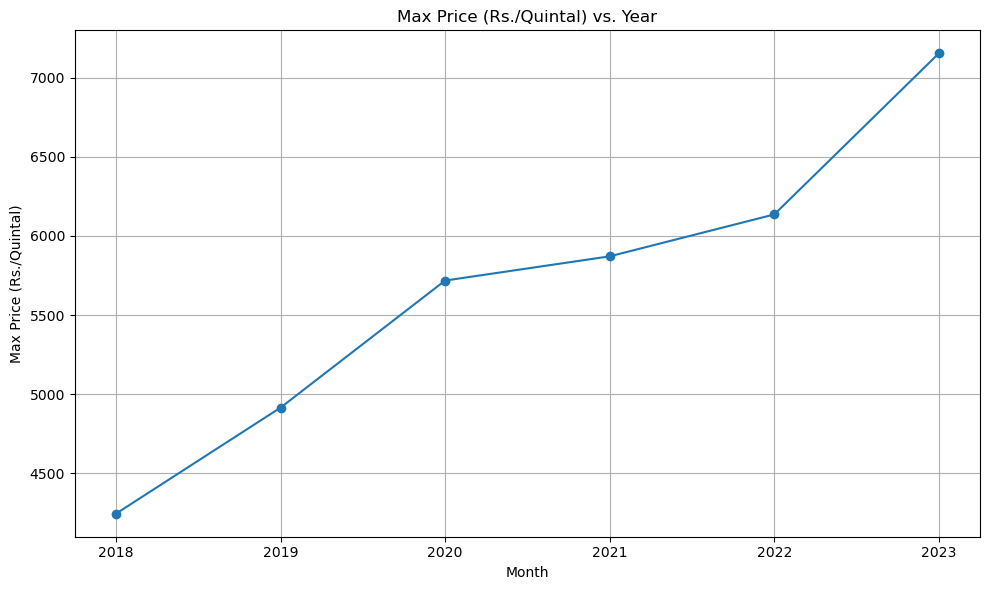

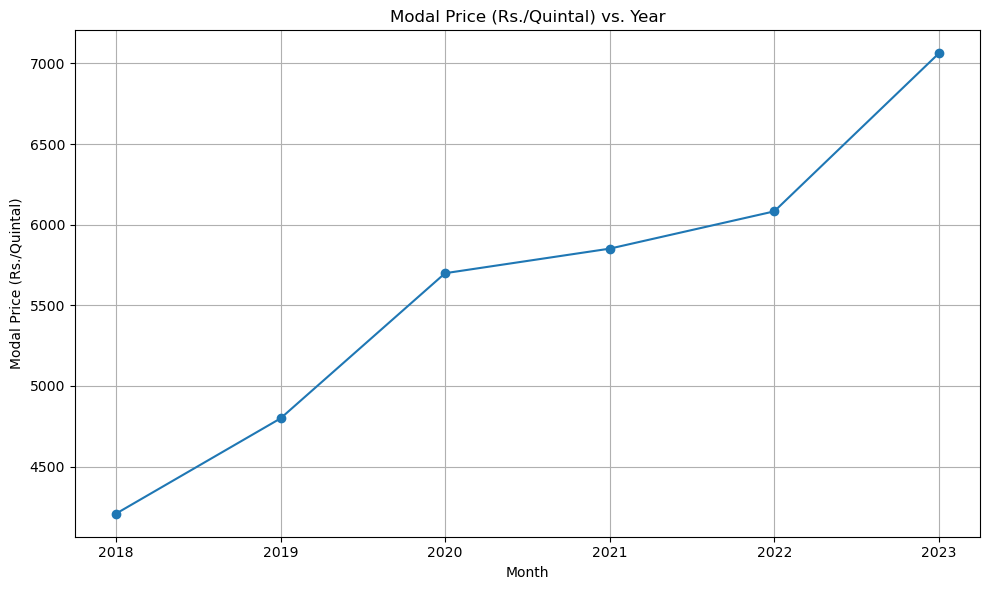

In [166]:
for column in columns_with_numerical_values:
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_mean_data.index, yearly_mean_data[column], marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'{column} vs. Year')
    plt.grid(True)
    plt.xticks(yearly_mean_data.index)  # Set x ticks to match the months
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### By the observation made usign the visulization it is clear the data shows a seasonality and a trend in time.

In [163]:
dataframe

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Day,Month,Year
0,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.6,5000,5050,5040,2022-12-08,8,12,2022
1,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.4,4350,4400,4380,2022-07-22,22,7,2022
2,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,6.5,4500,6950,4550,2019-02-06,6,2,2019
3,Madhya Pradesh,Panna,Ajaygarh,Small (Split),Pulses,9.2,4500,4630,4600,2019-02-05,5,2,2019
4,Madhya Pradesh,Chhindwara,Amarwda,Green Gram Dal,Pulses,150.0,3900,4100,4000,2022-09-16,16,9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,Madhya Pradesh,Ujjain,Ujjain,Green Gram Dal,Pulses,0.1,5151,5151,5151,2018-07-18,18,7,2018
1088,Madhya Pradesh,Ujjain,Ujjain,Green Gram Dal,Pulses,0.6,4300,4300,4300,2018-06-14,14,6,2018
1089,Madhya Pradesh,Ujjain,Ujjain,Green Gram Dal,Pulses,0.1,1500,1500,1500,2018-05-30,30,5,2018
1090,Madhya Pradesh,Ujjain,Ujjain,Green Gram Dal,Pulses,1.0,4500,4500,4500,2018-05-28,28,5,2018


In [164]:
data_market = dataframe.groupby('Market Name')[columns_with_numerical_values].mean()
data_market.head()


,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Market Name,,,,
Ajaygarh,6.675,4587.5,5257.5,4642.5
Amarwda,150.000,3900.0,4100.0,4000.0
Badwani,7.000,6188.0,6580.0,6320.0
Ghansour,2.600,4400.0,4400.0,4400.0
Hanumana,13.900,4000.0,4500.0,4500.0


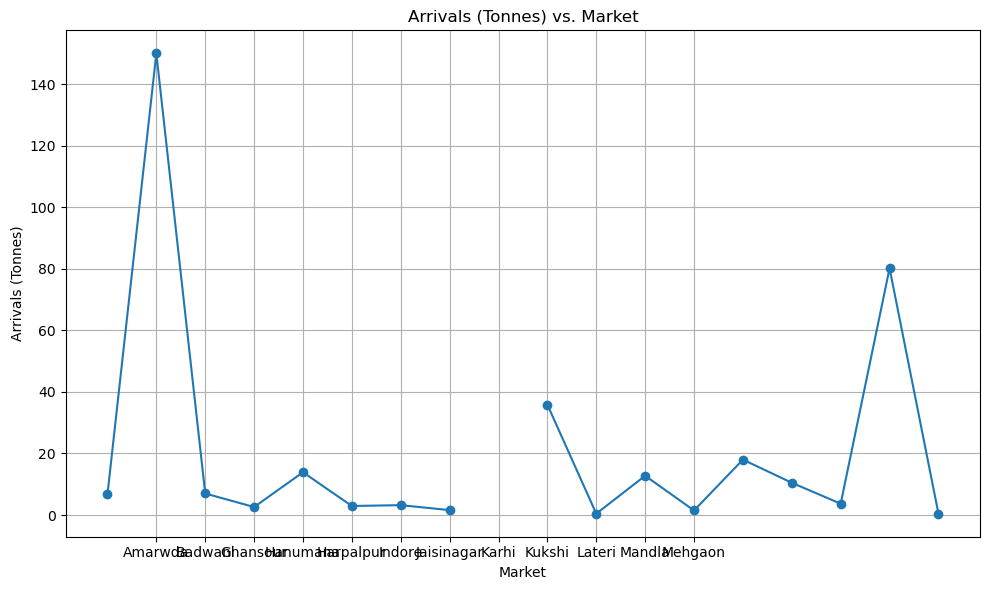

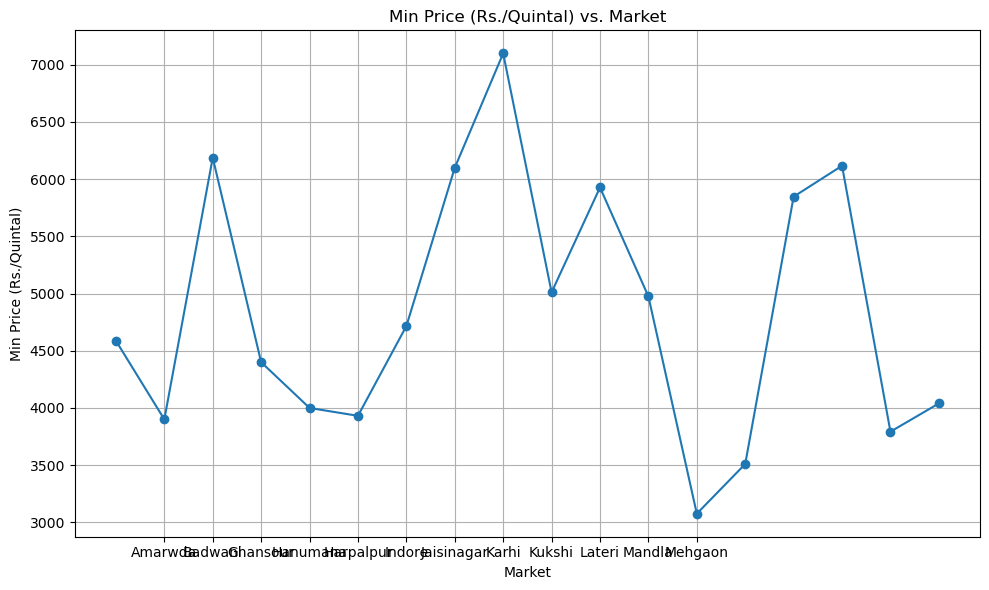

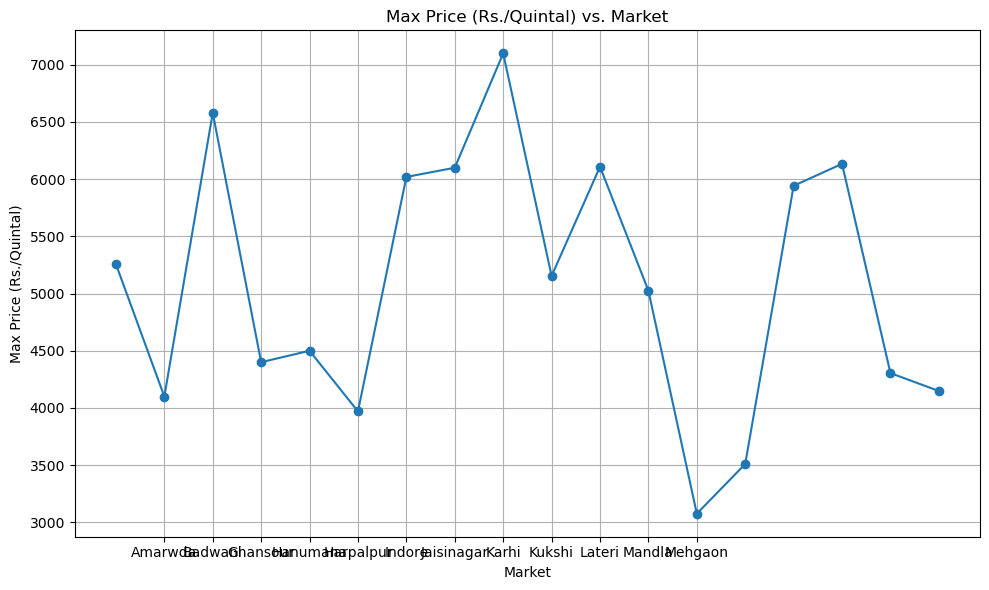

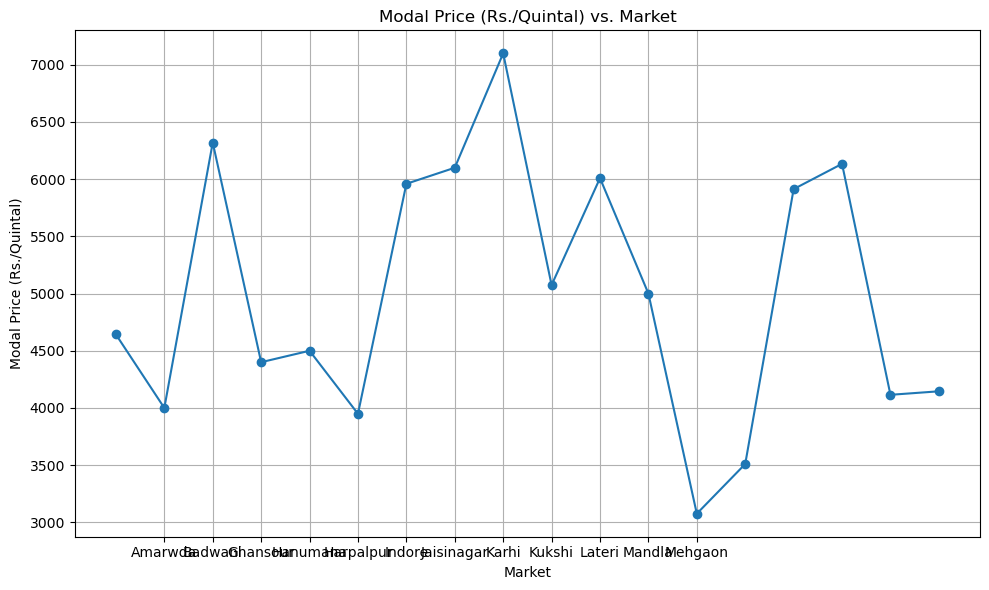

In [165]:
for column in columns_with_numerical_values:
    plt.figure(figsize=(10, 6))
    plt.plot(data_market.index, data_market[column], marker='o', linestyle='-')
    plt.xlabel('Market')
    plt.ylabel(column)
    plt.title(f'{column} vs. Market')
    plt.grid(True)
    plt.xticks(monthly_mean_data.index)  # Set x ticks to match the months
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [181]:
dataframe[col]

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Day,Month,Year
0,5.6,5000,5050,5040,2022-12-08,8,12,2022
1,5.4,4350,4400,4380,2022-07-22,22,7,2022
2,6.5,4500,6950,4550,2019-02-06,6,2,2019
3,9.2,4500,4630,4600,2019-02-05,5,2,2019
4,150.0,3900,4100,4000,2022-09-16,16,9,2022
...,...,...,...,...,...,...,...,...
1087,0.1,5151,5151,5151,2018-07-18,18,7,2018
1088,0.6,4300,4300,4300,2018-06-14,14,6,2018
1089,0.1,1500,1500,1500,2018-05-30,30,5,2018
1090,1.0,4500,4500,4500,2018-05-28,28,5,2018


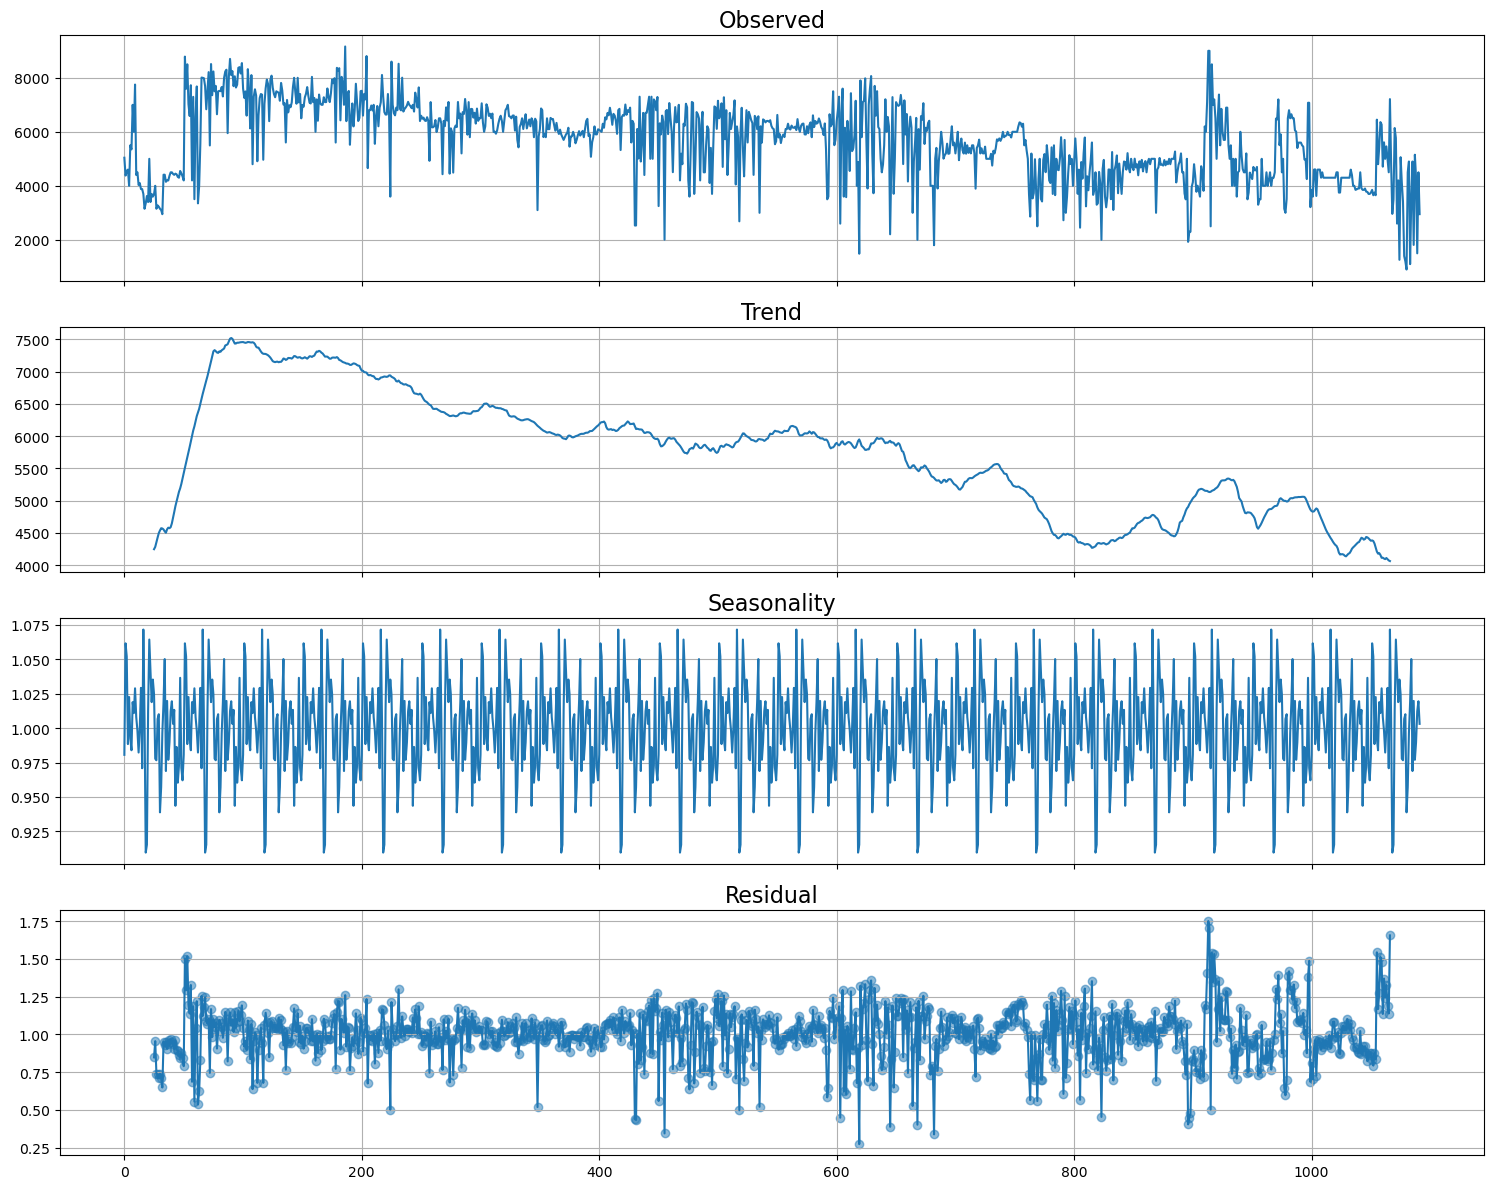

In [193]:
dataframe[col].set_index('Reported Date', inplace=True)

# Perform seasonal decomposition on the time series data
result = seasonal_decompose(dataframe[col]['Modal Price (Rs./Quintal)'], model='multiplicative', period=50)

# Extract the components
observed = result.observed
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the components with date labels
fig, axs = plt.subplots(4, figsize=(15, 12), sharex=True)

# Observed plot
axs[0].set_title('Observed', fontsize=16)
axs[0].plot(observed.index, observed, label='Observed')
axs[0].grid()

# Trend plot
axs[1].set_title('Trend', fontsize=16)
axs[1].plot(trend.index, trend, label='Trend')
axs[1].grid()

# Seasonality plot
axs[2].set_title('Seasonality', fontsize=16)
axs[2].plot(seasonal.index, seasonal, label='Seasonal')
axs[2].grid()

# Residual plot
axs[3].set_title('Residual', fontsize=16)
axs[3].plot(residual.index, residual, label='Residual')
axs[3].scatter(residual.index, residual, alpha=0.5)
axs[3].grid()

# Improve layout and show plot
plt.tight_layout()
plt.show()